C:\Users\Nur Izfarwiza\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


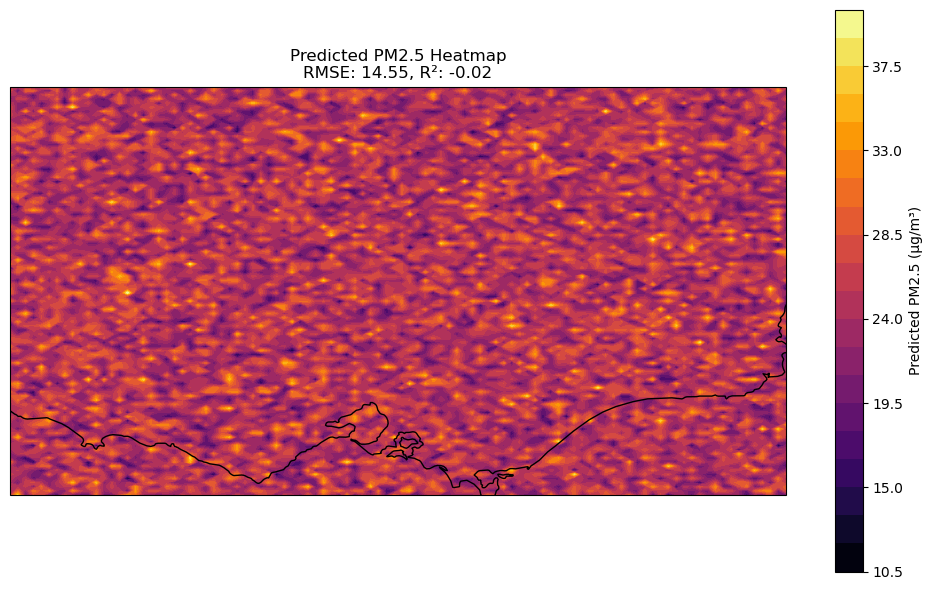

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Simulated enriched_df with columns: AOD, wind_speed, temp, rh, PM2.5
# In practice, you would load this from your actual data
np.random.seed(42)
N = 1000
enriched_df = pd.DataFrame({
    'AOD': np.random.rand(N),
    'wind_speed': np.random.rand(N) * 10,
    'temp': np.random.rand(N) * 20 + 10,
    'rh': np.random.rand(N),
    'PM2.5': np.random.rand(N) * 50
})

# === Retrain without 'qv' ===
X = enriched_df[['AOD', 'wind_speed', 'temp', 'rh']]
y = enriched_df['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# === Generate grid for prediction heatmap ===
lon_vals = np.linspace(140.5, 150, 100)
lat_vals = np.linspace(-39, -34, 100)
lon_grid, lat_grid = np.meshgrid(lon_vals, lat_vals)

# Simulate feature data over the grid (in practice, use real meteorological data)
aod = np.random.rand(100, 100)
wind = np.random.rand(100, 100) * 10
temp = np.random.rand(100, 100) * 20 + 10
rh = np.random.rand(100, 100)

features_grid = np.column_stack([
    aod.ravel(),
    wind.ravel(),
    temp.ravel(),
    rh.ravel()
])

# Predict PM2.5 over the grid
predicted_pm25 = rf.predict(features_grid).reshape(100, 100)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# === Plot the PM2.5 heatmap over Victoria ===
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([140.5, 150, -39, -34], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

pm25_plot = ax.contourf(lon_grid, lat_grid, predicted_pm25, levels=20, cmap='inferno', transform=ccrs.PlateCarree())
plt.colorbar(pm25_plot, label='Predicted PM2.5 (µg/m³)', orientation='vertical')
plt.title(f'Predicted PM2.5 Heatmap\nRMSE: {rmse:.2f}, R²: {r2:.2f}')
plt.tight_layout()
plt.show()
